In [1]:
import os
import re
import pandas as pd
import nltk
import re
from nltk import word_tokenize
import pymorphy2

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score

In [3]:
def get_data(text, tag):
    with open(text, 'r', encoding='utf-8') as f:
        data = f.read().split()
    text = [word.lower() for word in data if word.isalpha()]
    return lemmatize(text)

def lemmatize(text):
    morph = pymorphy2.MorphAnalyzer()
    return [(' '.join(text), ' '.join([morph.parse(word)[0].normal_form for word in text]), tag)]

In [4]:

tags = ['culture', 'hi-tech', 'politics', 'science']
texts = []

for tag in tags:
    path = f"C:\\Users\\dvb07\\OneDrive\\classificator\\corpus_news\\{tag}"
    print(path)
    for dirpath, dirnames, filenames in os.walk(path):
        for name in filenames:
            path1 = os.path.join(dirpath, name)
            texts += get_data(path1, tag)

C:\Users\dvb07\OneDrive\classificator\corpus_news\culture
C:\Users\dvb07\OneDrive\classificator\corpus_news\hi-tech
C:\Users\dvb07\OneDrive\classificator\corpus_news\politics
C:\Users\dvb07\OneDrive\classificator\corpus_news\science


In [5]:
raw_texts = []
lemmatized_texts = []

for line in texts:
    raw_texts.append(line[0])
    lemmatized_texts.append(line[1])
    
raw_texts
lemmatized_texts

['посещение храм василий блаженный мочь ограничить число посетитель храм василий блаженный мочь быть о это сообщить в руководство исторический по слово такой мера связать с забота о сохранение памятник русский большой людская поток негативно влиять на состояние древний роспись и в прошлый год антропогенный нагрузка достигнуть предельный храм василий блаженный самый посещать достопримечательность ежегодно там бывать более полмиллиона как именно мочь ограничить количество пока скорее квота коснуться только турист и не быть распространяться на паломник и',
 'александр серов назвать афина дочь но на тест днк согласиться бурный и страстный оказаться выпуск программа андрей малахов в который певец александр серов встретиться с поэтесса валентина она что год назад у они с серов быть и она родить от певец дочь который уже девять год жить на специально прилететь в чтобы принять участие в программа андрей сам серов некоторый время назад что у он в америка есть внебрачный однако он что с она мать

In [6]:
from rake_nltk import Rake

r = Rake(language = 'russian',
         max_length = 3,
         include_repeated_phrases=False)

raked_texts = []

for i in raw_texts:
    r.extract_keywords_from_text(i)
    i = ' '.join(r.get_ranked_phrases())
    raked_texts.append(i)

In [7]:
df = pd.DataFrame(texts, columns=['form', 'lemma', 'tag'])
df['raked'] = raked_texts
df

,form,lemma,tag,raked
0,посещение храма василия блаженного могут огран...,посещение храм василий блаженный мочь ограничи...,culture,состояние древних росписей руководстве историч...
1,александр серов назвал афину дочь но на тест д...,александр серов назвать афина дочь но на тест ...,culture,это покажет тест терпела многочисленные измены...
2,тарантино сожалеет о но душил цепью уму турман...,тарантино сожалеть о но душить цепь ум турман ...,culture,получила сотрясение мозга откровения умы турма...
3,подарок на и февраля вход в исторический музей...,подарок на и февраль вход в исторический музей...,culture,духовные специальная программа другие прежде х...
4,российским артистам предложили гастролировать ...,российский артист предложить гастролировать на...,culture,своей персоне скандальным заявил украинский эк...
...,...,...,...,...
1049,травма головы может спровоцировать развитие де...,травма голова мочь спровоцировать развитие дем...,science,эта работа наглядно тяжестью добавляет професс...
1050,шёлковым волокнам присвоили звание высокотехно...,шёлковый волокно присвоить звание высокотехнол...,science,янгом кимом продемонстрировала шёлковом волокн...
1051,мышей помогут людям справиться с постоянным бе...,мышь помочь человек справиться с постоянный бе...,science,помочь специалистам отыскать относительно малы...
1052,впервые измерил температуру в митохондриях кле...,впервые измерить температура в митохондрия кле...,science,это должно привести течение дня колеблется сжи...


In [8]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [9]:
vectorizer = TfidfVectorizer()

X_form = vectorizer.fit_transform(df.form).toarray()
y = df.tag
y_true = np.asarray(y)

pca = PCA(n_components=2)
data_form = pca.fit_transform(X_form)

In [10]:
def plots(data):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 7))

    scat = plt.scatter(data[:, 0], data[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
    plt.legend(*scat.legend_elements())

In [11]:
def stats(data, labels):
    import numpy as np
    sil_sc = silhouette_score(data, predicted, metric='euclidean')
    hom_sc = homogeneity_score(labels, predicted)
    comp_sc = completeness_score(labels, predicted)
    v_sc = v_measure_score(labels, predicted)

    return ['Silhouette score:', sil_sc, 'Homogeneity score:', hom_sc, 'Completeness score:', comp_sc, 'V-measure score:', v_sc]

# Аггломеративная Кластеризация

['Silhouette score:',
 0.3745824182725116,
 'Homogeneity score:',
 0.33441846249607865,
 'Completeness score:',
 0.36509104487167954,
 'V-measure score:',
 0.349082277255983]

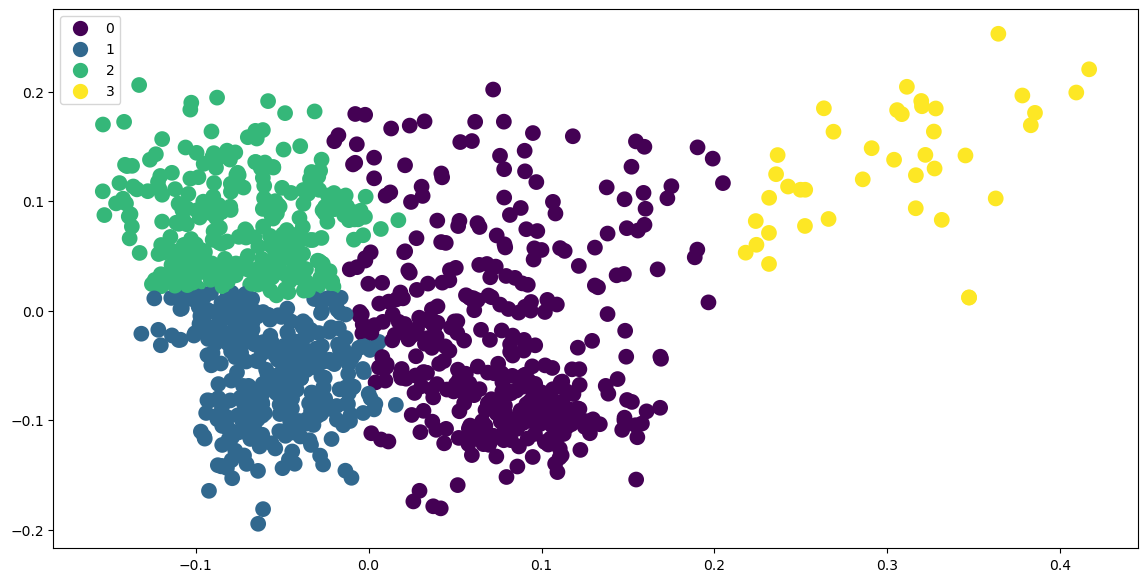

In [16]:
from sklearn.cluster import AgglomerativeClustering
aggl = AgglomerativeClustering(n_clusters=4)

aggl.fit(data_form)
predicted = aggl.fit_predict(data_form)

plots(data_form)
stats(data_form, y_true)

# DBSCAN

['Silhouette score:',
 -0.029140746099027313,
 'Homogeneity score:',
 0.2419243190610971,
 'Completeness score:',
 0.2558277176608347,
 'V-measure score:',
 0.24868184086056203]

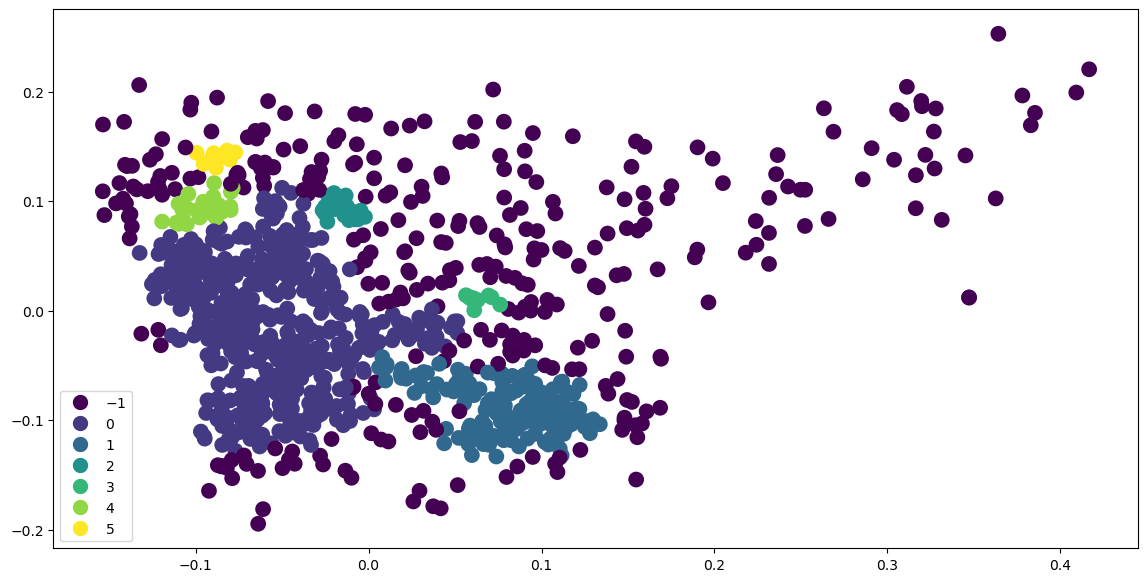

In [17]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data_form)

from sklearn.cluster import DBSCAN
dbscan =  DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X)
predicted = dbscan.fit_predict(X)

plots(data_form)
stats(data_form, y_true)

# Affinity Propagation

['Silhouette score:',
 0.09564581531469556,
 'Homogeneity score:',
 0.8137763529151381,
 'Completeness score:',
 0.21324286608746462,
 'V-measure score:',
 0.337933309599318]

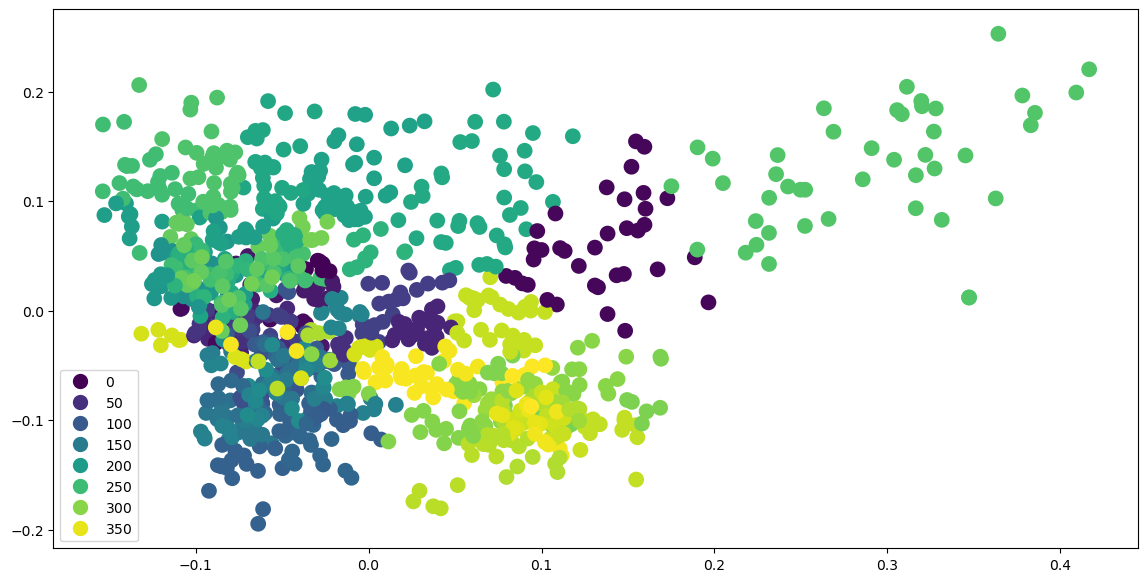

In [24]:
from sklearn.cluster import AffinityPropagation
affprop = AffinityPropagation(damping=0.7, convergence_iter=1)

affprop.fit(data_form)
cluster_centers_indices = affprop.cluster_centers_indices_

predicted = affprop.fit_predict(data_form)

plots(data_form)
stats(data_form, y_true)